# Aceing Tennis Predictions

## Overview
This project aims to use historical tennis match data to attempt to build a predictive model that will predict the outcome of a tennis match. Using the extensive data that has already been recorded, as well as using feature engineering, we will try and find out what will influence one's ability to win a match. This project can eventually be modified to fit into other sports such as pickleball(which I originally wanted this project to be about, but there is lack of data). The end product will be a tool where you can enter the competitors names, and it will give the winner, with the odds of them winning. 



## Background
Tennis has been a sport where mental toughness and physical endurance has tested every player that has touched the sport. Due to its long competitive history, there is a lot of data on the sport, especially since the creation of sportsbooks. You can find all kinds of stats for every game. Every athlete works very hard to become the best, but there will always be some type of underlying factor that may help or hinder their performance, such as the type of court surface they play on. Court types include: Grass, Clay, Hard and carpet. Different court surfaces will play differently, and the athletes style of play may benefit from the court types. For example, Wimbledon is played on a grass court. We could potentially also look at wind conditions and see which players adapt better. Players also have ratings called UTR(Universal Tennis Rating), which gives the athlete a rating between 1-16.5. This rating is more reliable when the player has more reliable matches recorded. Since we will be mostly looking at pro player data, this shouldn't be a problem.

## Data sources
I will be using publically available data from kaggle.
match data: https://www.kaggle.com/datasets/dissfya/atp-tennis-2000-2023daily-pull
player profile data: https://www.kaggle.com/datasets/mayankzach/atp-players-data

## Exploratory analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#loading dataset
tennis_data = pd.read_csv('atp_tennis.csv')
tennis_data.head()

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,-1,-1,-1.0,-1.0,6-4 6-2
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,-1,-1,-1.0,-1.0,3-6 3-6
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,-1,-1,-1.0,-1.0,6-7 7-5 6-3
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,-1,-1,-1.0,-1.0,1-6 4-6
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,81,198,-1,-1,-1.0,-1.0,7-6 5-7 6-4


In [5]:
tennis_data.shape

(64873, 17)

In [6]:
tennis_data.dtypes

Tournament     object
Date           object
Series         object
Court          object
Surface        object
Round          object
Best of         int64
Player_1       object
Player_2       object
Winner         object
Rank_1          int64
Rank_2          int64
Pts_1           int64
Pts_2           int64
Odd_1         float64
Odd_2         float64
Score          object
dtype: object

In [7]:
tennis_data["Date"] = pd.to_datetime(tennis_data["Date"])

In [8]:
tennis_data.dtypes

Tournament            object
Date          datetime64[ns]
Series                object
Court                 object
Surface               object
Round                 object
Best of                int64
Player_1              object
Player_2              object
Winner                object
Rank_1                 int64
Rank_2                 int64
Pts_1                  int64
Pts_2                  int64
Odd_1                float64
Odd_2                float64
Score                 object
dtype: object

In [9]:
surface_count = tennis_data["Surface"].value_counts()
print(surface_count)

Surface
Hard      35345
Clay      20739
Grass      7157
Carpet     1632
Name: count, dtype: int64


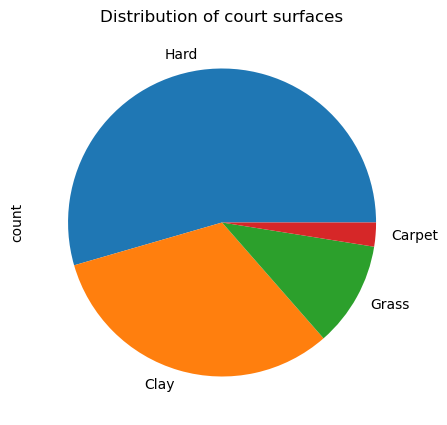

In [10]:
plt.figure(figsize = (5,5))
surface_count.plot.pie()
plt.title("Distribution of court surfaces")
plt.show()

It seems that more than 50% of games played are on hard court surfaces. And the next biggest bulk is Clay. Not many games are played on grass, this could mean that a player who does spend more time playing on grass surfaces, may have a better advantage.

In [11]:
unique_player1 = tennis_data["Player_1"].nunique()
unique_player2 = tennis_data["Player_2"].nunique()
print(f'unique player 1: {unique_player1} and unique player 2: {unique_player2}')

unique player 1: 1482 and unique player 2: 1471


In [12]:
tennis_data["ordered matched pairs"] = tennis_data.apply(
    lambda row: tuple(sorted([row['Player_1'],row['Player_2']])),
    axis = 1)
tennis_data.head()

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,ordered matched pairs
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,-1,-1,-1.0,-1.0,6-4 6-2,"(Dosedel S., Ljubicic I.)"
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,-1,-1,-1.0,-1.0,3-6 3-6,"(Clement A., Enqvist T.)"
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,-1,-1,-1.0,-1.0,6-7 7-5 6-3,"(Baccanello P., Escude N.)"
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,-1,-1,-1.0,-1.0,1-6 4-6,"(Federer R., Knippschild J.)"
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,81,198,-1,-1,-1.0,-1.0,7-6 5-7 6-4,"(Fromberg R., Woodbridge T.)"


In [13]:
matched_pair_counts =  tennis_data['ordered matched pairs'].value_counts()
print(matched_pair_counts)

ordered matched pairs
(Djokovic N., Nadal R.)            54
(Djokovic N., Federer R.)          46
(Federer R., Nadal R.)             40
(Djokovic N., Murray A.)           34
(Ferrer D., Nadal R.)              30
                                   ..
(Gimeno-Traver D., Patience O.)     1
(Belic L., Zverev M.)               1
(Cipolla F., Volandri F.)           1
(Karanusic R., Piccari F.)          1
(Fils A., Mensik J.)                1
Name: count, Length: 35786, dtype: int64


In [14]:
repeat_matchups = matched_pair_counts[matched_pair_counts > 1]
print(repeat_matchups)

ordered matched pairs
(Djokovic N., Nadal R.)         54
(Djokovic N., Federer R.)       46
(Federer R., Nadal R.)          40
(Djokovic N., Murray A.)        34
(Ferrer D., Nadal R.)           30
                                ..
(Bellucci T., Machado R.)        2
(Ancic M., Waske A.)             2
(Cerundolo F., Sinner J.)        2
(Fleishman Z., Gimelstob J.)     2
(Fish M., Sanguinetti D.)        2
Name: count, Length: 13050, dtype: int64


In [15]:
def create_matchup_df(Player_1,Player_2,df):
    pair = (Player_1, Player_2)
    matchup_df = df[df["ordered matched pairs"] == pair]
    return matchup_df

In [16]:
djokovic_v_nadal = create_matchup_df("Djokovic N.","Nadal R.",tennis_data)

In [17]:
djokovic_v_nadal.shape


(54, 18)

In [18]:
djokovic_v_nadal.head()

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,ordered matched pairs
20362,Pacific Life Open,2007-03-18,Masters,Outdoor,Hard,The Final,5,Nadal R.,Djokovic N.,Nadal R.,2,13,4480,1715,1.36,3.20,6-2 7-5,"(Djokovic N., Nadal R.)"
20448,Sony Ericsson Open,2007-03-29,Masters,Outdoor,Hard,Quarterfinals,3,Djokovic N.,Nadal R.,Djokovic N.,10,2,2060,4755,4.00,1.25,6-3 6-4,"(Djokovic N., Nadal R.)"
20752,Internazionali BNL d'Italia,2007-05-11,Masters,Outdoor,Clay,Quarterfinals,3,Nadal R.,Djokovic N.,Nadal R.,2,5,4875,2720,1.07,8.00,6-2 6-3,"(Djokovic N., Nadal R.)"
20958,French Open,2007-06-08,Grand Slam,Outdoor,Clay,Semifinals,5,Nadal R.,Djokovic N.,Nadal R.,2,6,5225,2810,1.06,8.50,7-5 6-4 6-2,"(Djokovic N., Nadal R.)"
21636,Rogers Masters,2007-08-12,Masters,Outdoor,Hard,Semifinals,3,Djokovic N.,Nadal R.,Djokovic N.,4,2,3200,5455,2.20,1.66,7-5 6-3,"(Djokovic N., Nadal R.)"


In [19]:
djokovic_v_nadal["Winner"].value_counts()


Winner
Djokovic N.    29
Nadal R.       25
Name: count, dtype: int64

We can now see the win rate of each player in their repeat matchups. This can help up us to find odds of each player against the same player better.

In [20]:
djokovic_v_nadal["Surface"].value_counts()

Surface
Clay     26
Hard     25
Grass     3
Name: count, dtype: int64

## Product
For the end product of this project, I would like to create a data visualization tool where you can input the players and it will predict the favored player along with stats of previous available games.

In [21]:
Player_1_input = "Djokovic N."
Player_2_input = "Nadal R."

In [22]:
def matchup_wins_per_surface(Player_1,Player_2, df):
    
    matchup_df = create_matchup_df(Player_1,Player_2, df)
    
    surface_summary = (
    matchup_df
    .groupby(["Surface", "Winner"])
    .size()
    .reset_index(name = "Wins")
    )
    
    return surface_summary

In [23]:
print(matchup_wins_per_surface(Player_1_input,Player_2_input, tennis_data))

  Surface       Winner  Wins
0    Clay  Djokovic N.     8
1    Clay     Nadal R.    18
2   Grass  Djokovic N.     2
3   Grass     Nadal R.     1
4    Hard  Djokovic N.    19
5    Hard     Nadal R.     6


In [24]:
def create_wins_per_surface_chart(df,
    xlabel = "Surface",
    ylabel = "Number of Wins",
    legend_title = "Winner"):
    
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(
        data=df,
        x="Surface",
        y="Wins",
        hue="Winner",
    )

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(title=legend_title)
    
    plt.show()
    return ax

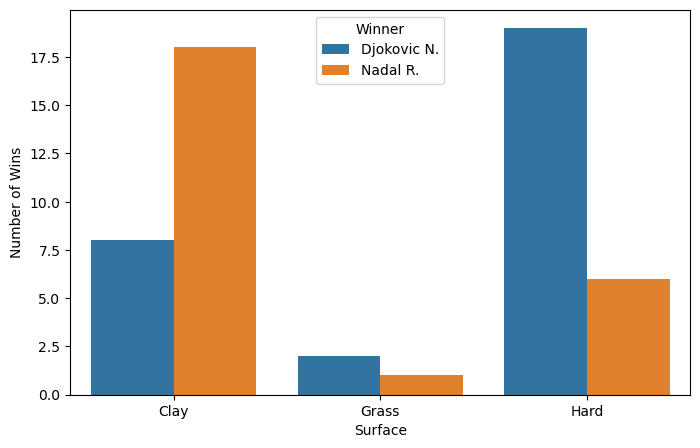

<Axes: xlabel='Surface', ylabel='Number of Wins'>

In [25]:
create_wins_per_surface_chart(matchup_wins_per_surface(Player_1_input,Player_2_input, tennis_data))

In [26]:
player_profiles = pd.read_csv("/Users/nicholashuynh/Downloads/atp_players.csv")
player_profiles.head()

,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
0,100001,Gardnar,Mulloy,R,19131122.0,USA,185.0,Q54544
1,100002,Pancho,Segura,R,19210620.0,ECU,168.0,Q54581
2,100003,Frank,Sedgman,R,19271002.0,AUS,180.0,Q962049
3,100004,Giuseppe,Merlo,R,19271011.0,ITA,NaN,Q1258752
4,100005,Richard,Gonzalez,R,19280509.0,USA,188.0,Q53554


In [27]:
player_profiles.shape

(64919, 8)

In [28]:
player_profiles["last_first"] = (player_profiles["name_last"] + " " + player_profiles["name_first"].str[0] + ".")

In [29]:
player_profiles.head()

,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id,last_first
0,100001,Gardnar,Mulloy,R,19131122.0,USA,185.0,Q54544,Mulloy G.
1,100002,Pancho,Segura,R,19210620.0,ECU,168.0,Q54581,Segura P.
2,100003,Frank,Sedgman,R,19271002.0,AUS,180.0,Q962049,Sedgman F.
3,100004,Giuseppe,Merlo,R,19271011.0,ITA,NaN,Q1258752,Merlo G.
4,100005,Richard,Gonzalez,R,19280509.0,USA,188.0,Q53554,Gonzalez R.


In [30]:
player_profiles['dob'] = pd.to_datetime(
    player_profiles['dob']
      .astype('Int64')
      .astype(str),
    format='%Y%m%d',
    errors='coerce'
)

In [31]:
player_profiles.head()

,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id,last_first
0,100001,Gardnar,Mulloy,R,1913-11-22,USA,185.0,Q54544,Mulloy G.
1,100002,Pancho,Segura,R,1921-06-20,ECU,168.0,Q54581,Segura P.
2,100003,Frank,Sedgman,R,1927-10-02,AUS,180.0,Q962049,Sedgman F.
3,100004,Giuseppe,Merlo,R,1927-10-11,ITA,NaN,Q1258752,Merlo G.
4,100005,Richard,Gonzalez,R,1928-05-09,USA,188.0,Q53554,Gonzalez R.


In [32]:
profile=player_profiles[['last_first', 'hand', 'dob', 'height', 'ioc']]

matches = tennis_data.merge(
    profile, left_on='Player_1', right_on='last_first', how='left'
).rename(columns={
    'hand': 'hand_1', 'dob': 'dob_1', 'height': 'height_1', 'ioc': 'ioc_1'
}).drop('last_first', axis=1)

matches = matches.merge(
    profile, left_on='Player_2', right_on='last_first', how='left'
).rename(columns={
    'hand': 'hand_2', 'dob': 'dob_2', 'height': 'height_2', 'ioc': 'ioc_2'
}).drop('last_first', axis=1)

In [33]:
matches.head()

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,...,Score,ordered matched pairs,hand_1,dob_1,height_1,ioc_1,hand_2,dob_2,height_2,ioc_2
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,...,6-4 6-2,"(Dosedel S., Ljubicic I.)",R,1970-08-14,183.0,CZE,R,1979-03-19,193.0,CRO
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,...,3-6 3-6,"(Clement A., Enqvist T.)",R,1977-12-17,173.0,FRA,R,1974-03-13,190.0,SWE
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,...,3-6 3-6,"(Clement A., Enqvist T.)",U,NaT,NaN,FRA,R,1974-03-13,190.0,SWE
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,...,6-7 7-5 6-3,"(Baccanello P., Escude N.)",R,1976-04-03,185.0,FRA,R,1979-06-12,183.0,AUS
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,...,1-6 4-6,"(Federer R., Knippschild J.)",R,1975-02-15,190.0,GER,R,1981-08-08,185.0,SUI


In [34]:
age1 = (matches['Date'] - matches['dob_1']).dt.days // 365
age2 = (matches['Date'] - matches['dob_2']).dt.days // 365
matches['age_1'] = age1.astype('Int64')
matches['age_2'] = age2.astype('Int64')
pd.options.display.max_columns = None
matches.head()

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,ordered matched pairs,hand_1,dob_1,height_1,ioc_1,hand_2,dob_2,height_2,ioc_2,age_1,age_2
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,-1,-1,-1.0,-1.0,6-4 6-2,"(Dosedel S., Ljubicic I.)",R,1970-08-14,183.0,CZE,R,1979-03-19,193.0,CRO,29,20
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,-1,-1,-1.0,-1.0,3-6 3-6,"(Clement A., Enqvist T.)",R,1977-12-17,173.0,FRA,R,1974-03-13,190.0,SWE,22,25
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,-1,-1,-1.0,-1.0,3-6 3-6,"(Clement A., Enqvist T.)",U,NaT,NaN,FRA,R,1974-03-13,190.0,SWE,<NA>,25
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,-1,-1,-1.0,-1.0,6-7 7-5 6-3,"(Baccanello P., Escude N.)",R,1976-04-03,185.0,FRA,R,1979-06-12,183.0,AUS,23,20
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,-1,-1,-1.0,-1.0,1-6 4-6,"(Federer R., Knippschild J.)",R,1975-02-15,190.0,GER,R,1981-08-08,185.0,SUI,24,18


In [35]:
def plot_player_wins_by_age(player_name, matches_df):
    
    win1 = (matches_df['Winner'] == player_name) & (matches_df['Player_1'] == player_name)
    win2 = (matches_df['Winner'] == player_name) & (matches_df['Player_2'] == player_name)
    
    ages1 = matches_df.loc[win1, 'age_1']
    ages2 = matches_df.loc[win2, 'age_2']
    
    all_ages = pd.concat([ages1, ages2]).dropna().astype(int)
    win_counts = all_ages.value_counts().sort_index()
    df_counts = win_counts.reset_index()
    df_counts.columns = ['age', 'wins']
    
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=df_counts,
        x='age',
        y='wins',
        color='skyblue'
    )
    ax.set_title(f'Number of Wins by Age for {player_name}')
    ax.set_xlabel('Age')
    ax.set_ylabel('Number of Wins')
    
    plt.tight_layout()
    plt.show()
    return ax

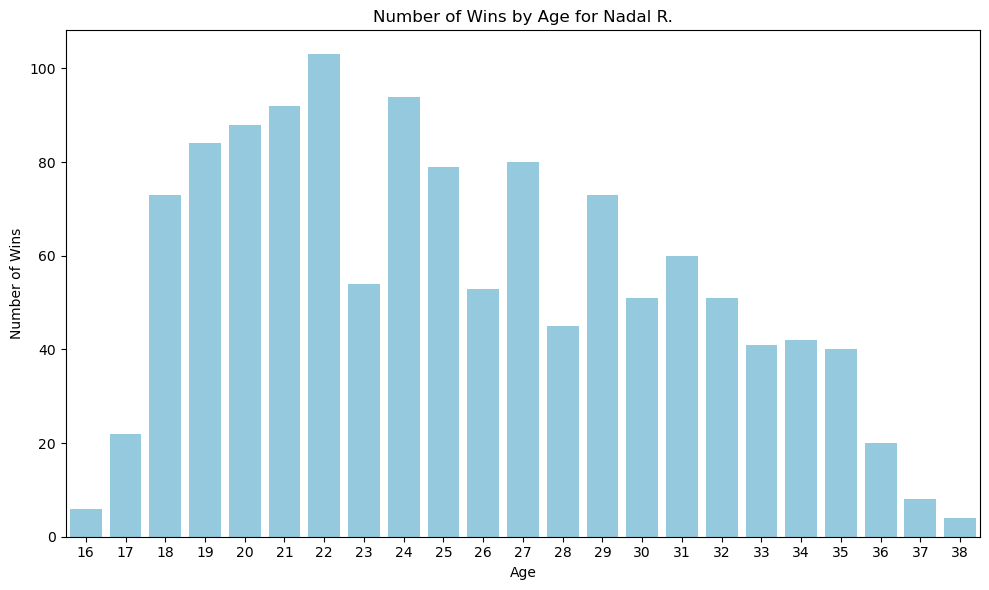

<Axes: title={'center': 'Number of Wins by Age for Nadal R.'}, xlabel='Age', ylabel='Number of Wins'>

In [36]:
plot_player_wins_by_age("Nadal R.", matches)

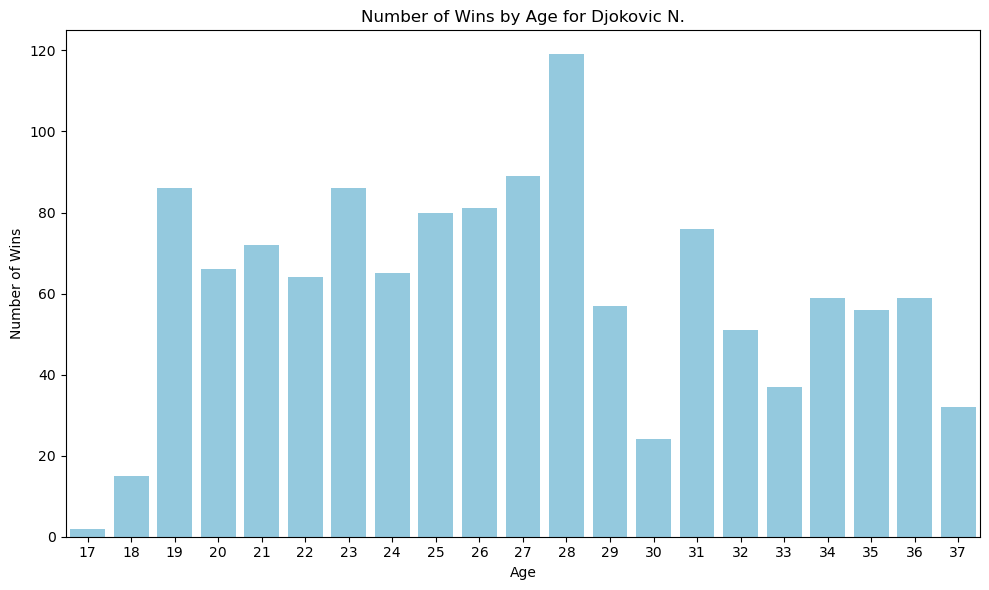

<Axes: title={'center': 'Number of Wins by Age for Djokovic N.'}, xlabel='Age', ylabel='Number of Wins'>

In [37]:
plot_player_wins_by_age("Djokovic N.", matches)

In [38]:

display(matches)

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,ordered matched pairs,hand_1,dob_1,height_1,ioc_1,hand_2,dob_2,height_2,ioc_2,age_1,age_2
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,-1,-1,-1.00,-1.00,6-4 6-2,"(Dosedel S., Ljubicic I.)",R,1970-08-14,183.0,CZE,R,1979-03-19,193.0,CRO,29,20
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,-1,-1,-1.00,-1.00,3-6 3-6,"(Clement A., Enqvist T.)",R,1977-12-17,173.0,FRA,R,1974-03-13,190.0,SWE,22,25
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,-1,-1,-1.00,-1.00,3-6 3-6,"(Clement A., Enqvist T.)",U,NaT,NaN,FRA,R,1974-03-13,190.0,SWE,<NA>,25
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,-1,-1,-1.00,-1.00,6-7 7-5 6-3,"(Baccanello P., Escude N.)",R,1976-04-03,185.0,FRA,R,1979-06-12,183.0,AUS,23,20
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,-1,-1,-1.00,-1.00,1-6 4-6,"(Federer R., Knippschild J.)",R,1975-02-15,190.0,GER,R,1981-08-08,185.0,SUI,24,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110026,Miami Open,2025-03-28,Masters 1000,Outdoor,Hard,Semifinals,3,Fritz T.,Mensik J.,Mensik J.,4,54,4900,1042,1.33,3.40,6-7 6-4 6-7,"(Fritz T., Mensik J.)",R,1997-10-28,193.0,USA,U,2005-09-01,NaN,CZE,27,19
110027,Miami Open,2025-03-28,Masters 1000,Outdoor,Hard,Semifinals,3,Fritz T.,Mensik J.,Mensik J.,4,54,4900,1042,1.33,3.40,6-7 6-4 6-7,"(Fritz T., Mensik J.)",U,1990-01-12,NaN,GER,U,2005-09-01,NaN,CZE,35,19
110028,Miami Open,2025-03-28,Masters 1000,Outdoor,Hard,Semifinals,3,Fritz T.,Mensik J.,Mensik J.,4,54,4900,1042,1.33,3.40,6-7 6-4 6-7,"(Fritz T., Mensik J.)",U,1990-01-12,NaN,GER,U,2005-09-01,NaN,CZE,35,19
110029,Miami Open,2025-03-31,Masters 1000,Outdoor,Hard,The Final,3,Mensik J.,Djokovic N.,Mensik J.,54,5,1042,3860,4.33,1.22,7-6 7-6,"(Djokovic N., Mensik J.)",U,2005-09-01,NaN,CZE,R,1987-05-22,188.0,SRB,19,37


In [39]:
def get_player_matches(player_name, matches_df):

    mask = (
        (matches_df['Player_1'] == player_name) |  (matches_df['Player_2'] == player_name))
    return matches_df.loc[mask].copy()

In [40]:
wins = pd.concat([
    matches[['Date','Player_1','Winner']].assign(
        player=lambda df: df['Player_1'],
        did_win=lambda df: (df['Winner'] == df['Player_1']).astype(int)
    )[['Date','player','did_win']],
    
    
    matches[['Date','Player_2','Winner']].assign(
        player=lambda df: df['Player_2'],
        did_win=lambda df: (df['Winner'] == df['Player_2']).astype(int)
    )[['Date','player','did_win']]
], ignore_index=True)

wins = wins.sort_values(['player','Date'])
wins['wins_cum'] = wins.groupby('player')['did_win'].cumsum()

matches = (
    matches
    .merge(
        wins.rename(columns={'player':'Player_1','wins_cum':'wins_to_date_1'}),
        on=['Player_1','Date'],
        how='left'
    )
    .merge(
        wins.rename(columns={'player':'Player_2','wins_cum':'wins_to_date_2'}),
        on=['Player_2','Date'],
        how='left'
    )
)

matches[['wins_to_date_1','wins_to_date_2']] = (
    matches[['wins_to_date_1','wins_to_date_2']]
    .fillna(0)
    .astype(int)
)


In [41]:
nadal_matches = get_player_matches("Nadal R.", matches)
nadal_matches


,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,ordered matched pairs,hand_1,dob_1,height_1,ioc_1,hand_2,dob_2,height_2,ioc_2,age_1,age_2,did_win_x,wins_to_date_1,did_win_y,wins_to_date_2
9443102,Monte Carlo Masters,2003-04-15,Masters,Outdoor,Clay,1st Round,3,Nadal R.,Kucera K.,Nadal R.,109,49,-1,-1,1.52525,2.235,6-1 6-2,"(Kucera K., Nadal R.)",L,1986-06-03,185.0,ESP,R,1974-03-04,188.0,SVK,16,29,1,1,0,80
9444915,Monte Carlo Masters,2003-04-16,Masters,Outdoor,Clay,2nd Round,3,Costa A.,Nadal R.,Nadal R.,7,109,-1,-1,1.20000,4.330,5-7 3-6,"(Costa A., Nadal R.)",R,1975-06-25,180.0,ESP,L,1986-06-03,185.0,ESP,27,16,0,354,1,2
9444916,Monte Carlo Masters,2003-04-16,Masters,Outdoor,Clay,2nd Round,3,Costa A.,Nadal R.,Nadal R.,7,109,-1,-1,1.20000,4.330,5-7 3-6,"(Costa A., Nadal R.)",R,1975-06-25,180.0,ESP,L,1986-06-03,185.0,ESP,27,16,0,354,1,3
9444917,Monte Carlo Masters,2003-04-16,Masters,Outdoor,Clay,2nd Round,3,Costa A.,Nadal R.,Nadal R.,7,109,-1,-1,1.20000,4.330,5-7 3-6,"(Costa A., Nadal R.)",R,1975-06-25,180.0,ESP,L,1986-06-03,185.0,ESP,27,16,0,354,1,4
9444918,Monte Carlo Masters,2003-04-16,Masters,Outdoor,Clay,2nd Round,3,Costa A.,Nadal R.,Nadal R.,7,109,-1,-1,1.20000,4.330,5-7 3-6,"(Costa A., Nadal R.)",R,1975-06-25,180.0,ESP,L,1986-06-03,185.0,ESP,27,16,0,354,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18487844,Nordea Open,2024-07-16,ATP250,Outdoor,Clay,1st Round,3,Nadal R.,Borg L.,Nadal R.,261,461,215,91,1.01000,26.000,6-3 6-4,"(Borg L., Nadal R.)",L,1986-06-03,185.0,ESP,R,2003-05-15,183.0,SWE,38,21,1,1260,0,1
18487859,Nordea Open,2024-07-18,ATP250,Outdoor,Clay,2nd Round,3,Nadal R.,Norrie C.,Nadal R.,261,42,215,1125,1.50000,2.630,6-4 6-4,"(Nadal R., Norrie C.)",L,1986-06-03,185.0,ESP,L,1995-08-23,188.0,GBR,38,28,1,1261,0,245
18487869,Nordea Open,2024-07-19,ATP250,Outdoor,Clay,Quarterfinals,3,Navone M.,Nadal R.,Nadal R.,36,261,1242,215,3.20000,1.360,7-6 5-7 5-7,"(Nadal R., Navone M.)",R,2001-02-27,NaN,ARG,L,1986-06-03,185.0,ESP,23,38,0,16,1,1262
18487872,Nordea Open,2024-07-20,ATP250,Outdoor,Clay,Semifinals,3,Nadal R.,Ajdukovic D.,Nadal R.,261,130,215,478,1.30000,3.500,4-6 6-3 6-4,"(Ajdukovic D., Nadal R.)",L,1986-06-03,185.0,ESP,R,2001-02-05,185.0,CRO,38,23,1,1263,0,4


In [42]:
matches["rank_diff"] = matches["Rank_1"]-matches["Rank_2"]


In [43]:
def compute_game_diff(score):
    if pd.isna(score):
        return 0
    diff = 0
    for sets in str(score).split():
        if '-' not in sets:
            continue
        a, b = sets.split('-', 1)
        p1 = int(''.join(filter(str.isdigit, a)))
        p2 = int(''.join(filter(str.isdigit, b)))
        diff += (p1 - p2)
    return diff

matches['game_diff'] = matches['Score'].apply(compute_game_diff)


In [44]:

matches['ordered_matched_pairs'] = matches['ordered matched pairs'].astype(str)


matches['h2h_wins_1'] = (
    matches
    .groupby('ordered_matched_pairs')['did_win_x']
    .transform(lambda x: x.shift(1).cumsum().fillna(0))
)

matches['h2h_wins_2'] = (
    matches
    .groupby('ordered_matched_pairs')['did_win_y']
    .transform(lambda x: x.shift(1).cumsum().fillna(0))
)
matches['h2h_total_matches'] = matches['h2h_wins_1'] + matches['h2h_wins_2']
matches['h2h_win_ratio_1'] = matches['h2h_wins_1'] / matches['h2h_total_matches']
matches['h2h_win_ratio_1'] = matches['h2h_win_ratio_1'].fillna(0)


In [45]:
matches.drop_duplicates(
    subset=['Tournament','Date','Player_1','Player_2','Round'],
    keep='first',
    inplace=True
)
matches.reset_index(drop=True, inplace=True)


In [46]:

dedup = matches.drop_duplicates(
    subset=['Tournament','Date','Player_1','Player_2','Surface','Round']
)

surface_pct_1 = (
    dedup
      .groupby(['Player_1','Surface'])['did_win_x']
      .mean()
      .reset_index(name='surf_win_pct_1')
)

surface_pct_2 = (
    dedup
      .groupby(['Player_2','Surface'])['did_win_y']
      .mean()
      .reset_index(name='surf_win_pct_2')
)

matches = (
    matches
      .merge(surface_pct_1, on=['Player_1','Surface'], how='left')
      .merge(surface_pct_2, on=['Player_2','Surface'], how='left')
)

matches['surf_win_pct_1'] = matches['surf_win_pct_1'].fillna(0.5)
matches['surf_win_pct_2'] = matches['surf_win_pct_2'].fillna(0.5)


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

def compute_normalized_winrate_slope(player_name, matches_df):

    mask1 = (matches_df['Player_1'] == player_name)
    mask2 = (matches_df['Player_2'] == player_name)

    ages1 = matches_df.loc[mask1, ['age_1', 'did_win_x']].rename(columns={'age_1':'age', 'did_win_x':'win'})
    ages2 = matches_df.loc[mask2, ['age_2', 'did_win_y']].rename(columns={'age_2':'age', 'did_win_y':'win'})

    df = pd.concat([ages1, ages2], ignore_index=True).dropna(subset=['age'])
    if df.empty:
        return 0.0

    summary = (
        df
        .groupby('age')
        .agg(wins=('win','sum'), matches=('win','size'))
        .reset_index()
    )
    if len(summary) < 2:
        return 0.
    summary['win_rate'] = summary['wins'] / summary['matches']

    X = summary[['age']].values
    y = summary['win_rate'].values.reshape(-1,1)

    scaler_x = StandardScaler()
    scaler_y = StandardScaler()
    Xs = scaler_x.fit_transform(X)
    ys = scaler_y.fit_transform(y).ravel()

    model = LinearRegression()
    model.fit(Xs, ys)
    return float(model.coef_[0])


In [48]:
all_players= pd.unique(
    pd.concat([matches['Player_1'], matches['Player_2']])
)
slopes = []
for p in all_players:
    slope = compute_normalized_winrate_slope(p, matches)
    slopes.append({'player': p, 'age_win_slope': slope})

df_slopes= pd.DataFrame(slopes)



In [49]:
df_slopes

,player,age_win_slope
0,Dosedel S.,-0.981437
1,Clement A.,-0.891426
2,Escude N.,-0.184352
3,Knippschild J.,0.956932
4,Fromberg R.,-0.999754
...,...,...
1733,Habib H.,0.000000
1734,Samrej K.,0.000000
1735,Rottgering M.,0.000000
1736,Trotter J.K.,0.000000


In [50]:

matches_with_slope = matches.merge(
    df_slopes,
    left_on='Player_1',
    right_on='player',
    how='left'
).rename(columns={'age_win_slope':'slope_1'}).drop(columns=['player'])


In [51]:
matches_with_slope = matches_with_slope.merge(
    df_slopes,
    left_on='Player_2',
    right_on='player',
    how='left'
).rename(columns={'age_win_slope':'slope_2'}).drop(columns=['player'])

In [52]:
matches = matches_with_slope

In [53]:
matches["surf_win_pct_diff"] = matches["surf_win_pct_1"]-matches["surf_win_pct_2"]

In [54]:
# 1) Surface‐specific H2H cumulative wins for Player 1
matches['h2h_surf_wins_1'] = (
    matches
      .groupby(['ordered matched pairs','Surface'])['did_win_x']
      .transform(lambda s: s.shift(1).cumsum().fillna(0))
)

# 2) Surface‐specific H2H cumulative wins for Player 2
matches['h2h_surf_wins_2'] = (
    matches
      .groupby(['ordered matched pairs','Surface'])['did_win_y']
      .transform(lambda s: s.shift(1).cumsum().fillna(0))
)

matches['h2h_surf_total'] = matches['h2h_surf_wins_1'] + matches['h2h_surf_wins_2']


matches['h2h_surf_diff'] = (matches['h2h_surf_wins_1'] - matches['h2h_surf_wins_2'])



In [55]:
RECENT_N = 10

wins = pd.concat([
    matches[['Date','Player_1','did_win_x']].rename(
        columns={'Player_1':'player','did_win_x':'did_win'}
    ),
    matches[['Date','Player_2','did_win_y']].rename(
        columns={'Player_2':'player','did_win_y':'did_win'}
    )
], ignore_index=True)

wins['winrate_last5'] = (
    wins
      .groupby('player')['did_win']
      .transform(
          lambda s: s.shift(1)    
                     .rolling(window=RECENT_N,            
                              min_periods=1) 
                     .mean()
      )
    )

matches = matches.merge(
    wins[['player','Date','winrate_last5']]
         .rename(columns={'player':'Player_1','winrate_last5':'form_1'}),
    on=['Player_1','Date'], how='left'
).merge(
    wins[['player','Date','winrate_last5']]
         .rename(columns={'player':'Player_2','winrate_last5':'form_2'}),
    on=['Player_2','Date'], how='left'
)

matches['form_1'] = matches['form_1'].fillna(0.5)
matches['form_2'] = matches['form_2'].fillna(0.5)



In [56]:
djokovic_v_nadal = create_matchup_df("Djokovic N.","Nadal R.",matches)
djokovic_v_nadal

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,ordered matched pairs,hand_1,dob_1,height_1,ioc_1,hand_2,dob_2,height_2,ioc_2,age_1,age_2,did_win_x,wins_to_date_1,did_win_y,wins_to_date_2,rank_diff,game_diff,ordered_matched_pairs,h2h_wins_1,h2h_wins_2,h2h_total_matches,h2h_win_ratio_1,surf_win_pct_1,surf_win_pct_2,slope_1,slope_2,surf_win_pct_diff,h2h_surf_wins_1,h2h_surf_wins_2,h2h_surf_total,h2h_surf_diff,form_1,form_2
75976,Pacific Life Open,2007-03-18,Masters,Outdoor,Hard,The Final,5,Nadal R.,Djokovic N.,Nadal R.,2,13,4480,1715,1.36,3.20,6-2 7-5,"(Djokovic N., Nadal R.)",L,1986-06-03,185.0,ESP,R,1987-05-22,188.0,SRB,20,19,1,246,1,82,-11,6,"('Djokovic N.', 'Nadal R.')",0.0,0.0,0.0,0.000000,0.792079,0.860406,0.057694,0.503185,-0.068327,0.0,0.0,0.0,0.0,0.8,1.0
75977,Pacific Life Open,2007-03-18,Masters,Outdoor,Hard,The Final,5,Nadal R.,Djokovic N.,Nadal R.,2,13,4480,1715,1.36,3.20,6-2 7-5,"(Djokovic N., Nadal R.)",L,1986-06-03,185.0,ESP,R,1987-05-22,188.0,SRB,20,19,1,246,1,82,-11,6,"('Djokovic N.', 'Nadal R.')",0.0,0.0,0.0,0.000000,0.792079,0.860406,0.057694,0.503185,-0.068327,0.0,0.0,0.0,0.0,0.8,1.0
76063,Sony Ericsson Open,2007-03-29,Masters,Outdoor,Hard,Quarterfinals,3,Djokovic N.,Nadal R.,Djokovic N.,10,2,2060,4755,4.00,1.25,6-3 6-4,"(Djokovic N., Nadal R.)",R,1987-05-22,188.0,SRB,L,1986-06-03,185.0,ESP,19,20,1,90,0,248,8,5,"('Djokovic N.', 'Nadal R.')",3.0,2.0,5.0,0.600000,0.842391,0.770000,0.503185,0.057694,0.072391,1.0,1.0,2.0,0.0,0.6,0.8
76373,Internazionali BNL d'Italia,2007-05-11,Masters,Outdoor,Clay,Quarterfinals,3,Nadal R.,Djokovic N.,Nadal R.,2,5,4875,2720,1.07,8.00,6-2 6-3,"(Djokovic N., Nadal R.)",L,1986-06-03,185.0,ESP,R,1987-05-22,188.0,SRB,20,19,1,262,0,103,-3,7,"('Djokovic N.', 'Nadal R.')",4.0,2.0,6.0,0.666667,0.914729,0.810345,0.057694,0.503185,0.104384,0.0,0.0,0.0,0.0,1.0,1.0
76593,French Open,2007-06-08,Grand Slam,Outdoor,Clay,Semifinals,5,Nadal R.,Djokovic N.,Nadal R.,2,6,5225,2810,1.06,8.50,7-5 6-4 6-2,"(Djokovic N., Nadal R.)",L,1986-06-03,185.0,ESP,R,1987-05-22,188.0,SRB,21,20,1,279,0,111,-4,8,"('Djokovic N.', 'Nadal R.')",5.0,2.0,7.0,0.714286,0.914729,0.810345,0.057694,0.503185,0.104384,1.0,0.0,1.0,1.0,0.9,0.8
77326,Rogers Masters,2007-08-12,Masters,Outdoor,Hard,Semifinals,3,Djokovic N.,Nadal R.,Djokovic N.,4,2,3200,5455,2.20,1.66,7-5 6-3,"(Djokovic N., Nadal R.)",R,1987-05-22,188.0,SRB,L,1986-06-03,185.0,ESP,20,21,1,123,0,299,2,5,"('Djokovic N.', 'Nadal R.')",6.0,2.0,8.0,0.750000,0.842391,0.770000,0.503185,0.057694,0.072391,2.0,1.0,3.0,1.0,1.0,0.9
78051,Masters Cup,2007-11-15,Masters Cup,Indoor,Hard,Round Robin,3,Djokovic N.,Nadal R.,Nadal R.,3,2,4470,5535,4.50,1.16,4-6 4-6,"(Djokovic N., Nadal R.)",R,1987-05-22,188.0,SRB,L,1986-06-03,185.0,ESP,20,21,0,138,1,320,1,-4,"('Djokovic N.', 'Nadal R.')",7.0,2.0,9.0,0.777778,0.842391,0.770000,0.503185,0.057694,0.072391,3.0,1.0,4.0,2.0,0.8,0.8
78824,Pacific Life Open,2008-03-22,Masters,Outdoor,Hard,Semifinals,3,Nadal R.,Djokovic N.,Djokovic N.,2,3,5980,5130,2.37,1.57,3-6 2-6,"(Djokovic N., Nadal R.)",L,1986-06-03,185.0,ESP,R,1987-05-22,188.0,SRB,21,20,0,339,1,157,-1,-7,"('Djokovic N.', 'Nadal R.')",7.0,3.0,10.0,0.700000,0.792079,0.860406,0.057694,0.503185,-0.068327,3.0,2.0,5.0,1.0,0.8,0.6
79240,Hamburg TMS,2008-05-17,Masters,Outdoor,Clay,Semifinals,3,Djokovic N.,Nadal R.,Nadal R.,3,2,5125,5435,2.87,1.40,5-7 6-2 2-6,"(Djokovic N., Nadal R.)",R,1987-05-22,188.0,SRB,L,1986-06-03,185.0,ESP,21,21,0,170,1,364,1,-2,"('Djokovic N.', 'Nadal R.')",7.0,4.0,11.0,0.636364,0.818792,0.890244,0.503185,0.057694,-0.071452,2.0,0.0,2.0,2.0,0.8,0.9
79437,French Open,2008-06-06,Grand Slam,Outdoor,Clay,Semifinals,5,Djokovic N.,Nadal R.,Nadal R.,3,2,5225,5585,4.50,1.20,4-6 2-6 6-7,"(Djokovic N., Nadal R.)",R,1987-05-22,188.0,SRB,L,1986-06-03,185.0,ESP,21,22,0,175,1,371,1,-7,"('Djokovic N.', 'Nadal R.')",7.0,5.0,12.0,0.583333,0.818792,0.890244,0.503185,0.057694,-0.071452,2.0,1.0,3.0,1.0,0.8,0.9


## Predictive Model

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

In [58]:
NUMERIC_FEATURES = [
    'rank_diff',
    'wins_to_date_1', 'wins_to_date_2','h2h_win_ratio_1', 'surf_win_pct_1', 'surf_win_pct_2', 'surf_win_pct_diff', 'slope_1', 'slope_2', 'h2h_surf_wins_1', 'h2h_surf_wins_2', 'h2h_surf_diff', 'form_1', 'form_2'
]

In [59]:
CATEGORICAL_FEATURES = [
    'Surface'
]

In [60]:
TARGET = 'did_win_x'

In [61]:
df = matches.dropna(subset=NUMERIC_FEATURES + CATEGORICAL_FEATURES + [TARGET])

X = df[NUMERIC_FEATURES + CATEGORICAL_FEATURES]
y = df[TARGET]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [63]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [64]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [65]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, NUMERIC_FEATURES),
        ('cat', categorical_transformer, CATEGORICAL_FEATURES)
    ]
)

In [66]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        max_iter=1000,
        random_state=42,
    ))
])

In [67]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['rank_diff',
                                                   'wins_to_date_1',
                                                   'wins_to_date_2',
                                                   'h2h_win_ratio_1',
                                                   'surf_win_pct_1',
                                                   'surf_win_pct_2',
                                                   'surf_win_pct_diff',
                                                   'slope_1', 'slope_2',
                                                   'h2h_surf_wins_1',
                                                   'h2h_surf_wins_2',
                                                   'h2h_surf_diff', 'form_1',
                                                   'form_2']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Surface'])])),
                ('model', LogisticRegression(max_iter=1000, random_state=42))])

In [68]:
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7531979239037149
ROC AUC: 0.8004239114424158

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.51      0.59      8524
           1       0.77      0.88      0.82     15945

    accuracy                           0.75     24469
   macro avg       0.74      0.70      0.71     24469
weighted avg       0.75      0.75      0.74     24469



              feature      coef  abs_coef
0      surf_win_pct_1  0.641838  0.641838
1   surf_win_pct_diff  0.526312  0.526312
2           rank_diff -0.247849  0.247849
3       Surface_Grass  0.222829  0.222829
4              form_1  0.210281  0.210281
5      Surface_Carpet  0.199311  0.199311
6      wins_to_date_2 -0.185723  0.185723
7             slope_2 -0.146560  0.146560
8             slope_1 -0.142552  0.142552
9        Surface_Clay  0.140092  0.140092
10     wins_to_date_1 -0.135604  0.135604
11       Surface_Hard  0.104748  0.104748
12    h2h_win_ratio_1 -0.062589  0.062589
13     surf_win_pct_2 -0.020377  0.020377
14    h2h_surf_wins_2 -0.018858  0.018858


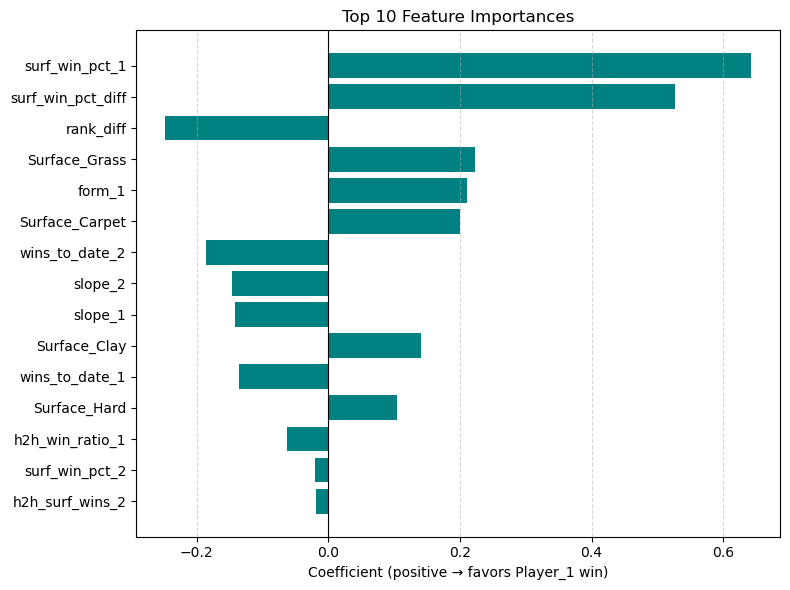

In [69]:

preprocessor = pipeline.named_steps['preprocessor']
model = pipeline.named_steps['model']

numeric_feats = NUMERIC_FEATURES

ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_feats = CATEGORICAL_FEATURES
onehot_feats = ohe.get_feature_names_out(cat_feats).tolist()

feature_names = numeric_feats + onehot_feats

coefs = model.coef_.flatten()

feat_imp = pd.DataFrame({
    'feature': feature_names,
    'coef':    coefs
})
feat_imp['abs_coef'] = feat_imp['coef'].abs()
feat_imp = feat_imp.sort_values('abs_coef', ascending=False).reset_index(drop=True)

print(feat_imp.head(15))

top10 = feat_imp.head(15).iloc[::-1] 
plt.figure(figsize=(8,6))
plt.barh(top10['feature'], top10['coef'], color='teal')
plt.axvline(0, color='k', linewidth=0.8)
plt.xlabel('Coefficient (positive → favors Player_1 win)')
plt.title('Top 10 Feature Importances')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [70]:
import pickle
with open('tennis_pipeline.pkl','wb') as f:
    pickle.dump(pipeline, f)

In [71]:
matches.to_csv('matches.csv', index=False)

In [72]:
#player_profiles.to_csv('players.csv', index=False)